In [12]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ss
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
# reading the file
cs = pd.read_csv('/content/ifood_df.csv')

In [4]:
cs.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [5]:
# Check for missing values
print(cs.isnull().sum())


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [8]:
# Step 5: Remove duplicates
cs = cs.drop_duplicates()
cs.reset_index(drop=True, inplace=True)

In [9]:
print("Data shape:", cs.shape)

Data shape: (2021, 39)


In [11]:
## descrpitive statistics
# 1. Total Monetary Spend per Customer
spend_columns = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cs['TotalSpend'] = cs[spend_columns].sum(axis=1)

# 2. Average Purchase Value
avg_purchase_value = cs['TotalSpend'].mean()

# 3. Purchase Frequency (sum of purchases across all channels)
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases']
cs['TotalPurchases'] = cs[purchase_columns].sum(axis=1)
avg_frequency = cs['TotalPurchases'].mean()

# 4. Recency (days since last purchase)
avg_recency = cs['Recency'].mean() if 'Recency' in cs.columns else None

# 5. Income stats
avg_income = cs['Income'].mean() if 'Income' in cs.columns else None

# 6. Summary Statistics
summary = cs[['TotalSpend', 'TotalPurchases', 'Income', 'Recency']].describe()

# Print results
print("📊 Key Customer Metrics:")
print(f"• Average Purchase Value: ₹{avg_purchase_value:.2f}")
print(f"• Average Purchase Frequency: {avg_frequency:.2f} purchases")
print(f"• Average Recency: {avg_recency:.2f} days since last purchase")
print(f"• Average Income: ₹{avg_income:.2f}")

print("\n📋 Summary Table:")
print(summary)


📊 Key Customer Metrics:
• Average Purchase Value: ₹607.71
• Average Purchase Frequency: 14.90 purchases
• Average Recency: 48.88 days since last purchase
• Average Income: ₹51687.26

📋 Summary Table:
        TotalSpend  TotalPurchases         Income      Recency
count  2021.000000     2021.000000    2021.000000  2021.000000
mean    607.711034       14.897575   51687.258783    48.880752
std     602.396167        7.598261   20713.046401    28.950917
min       5.000000        0.000000    1730.000000     0.000000
25%      69.000000        8.000000   35416.000000    24.000000
50%     397.000000       15.000000   51412.000000    49.000000
75%    1048.000000       21.000000   68274.000000    74.000000
max    2525.000000       43.000000  113734.000000    99.000000


In [13]:
#Customer segmentation
#feature selection
features = [
    'Income', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases'
]

X = cs[features]


In [14]:
# normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
# Apply KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
cs['Cluster'] = kmeans.fit_predict(X_scaled)


In [22]:
# View average behavior per cluster
cluster_summary = cs.groupby('Cluster')[features].mean()
print(cluster_summary)


               Income    Recency    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                                    
0        34270.073951  49.077263   38.780353   4.631347        20.920530   
1        75026.221902  49.665706  709.426513  38.743516       427.956772   
2        55002.694501  48.293279  406.816701  17.319756       112.890020   
3        73540.942238  48.296029  499.523466  97.974729       406.942238   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Cluster                                                                       
0               6.536424          4.974614     14.419426           1.951435   
1              67.051873         41.855908     60.161383           1.466859   
2              23.274949         16.778004     57.832994           4.016293   
3             127.725632        100.509025     95.415162           1.660650   

         NumWebPurchases  NumCatalogPurchases  NumStorePurchases  
C

In [24]:
# Create Total Spending Feature
cs['Total_Spending'] = cs[[
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds'
]].sum(axis=1)


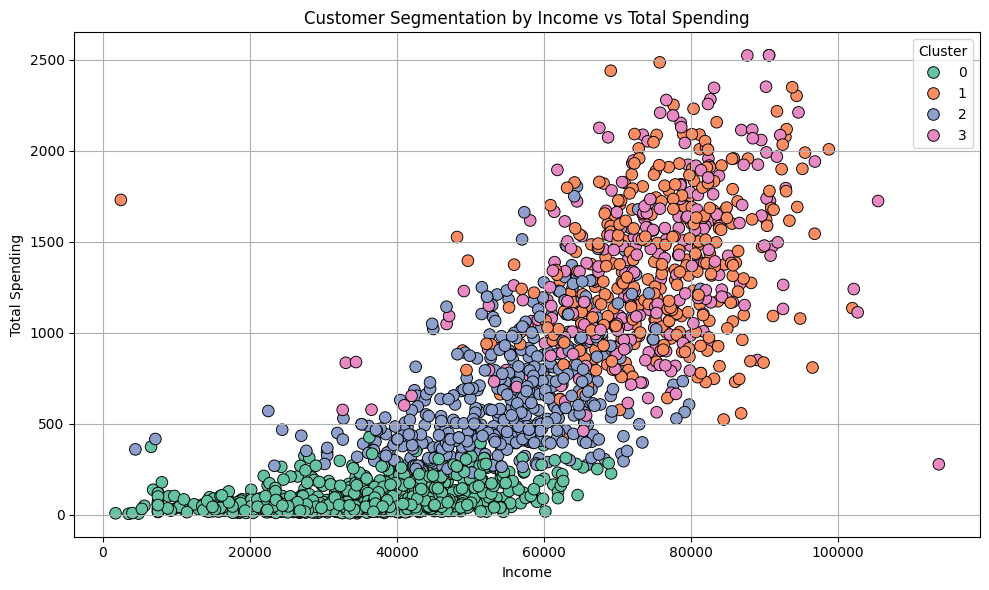

In [25]:

# Scatter Plot: Income vs Total Spending by Cluster
plt.figure(figsize=(10,6))
ss.scatterplot(
    data=cs,
    x='Income',
    y='Total_Spending',
    hue='Cluster',
    palette='Set2',
    s=70,
    edgecolor='black'
)

plt.title("Customer Segmentation by Income vs Total Spending")
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

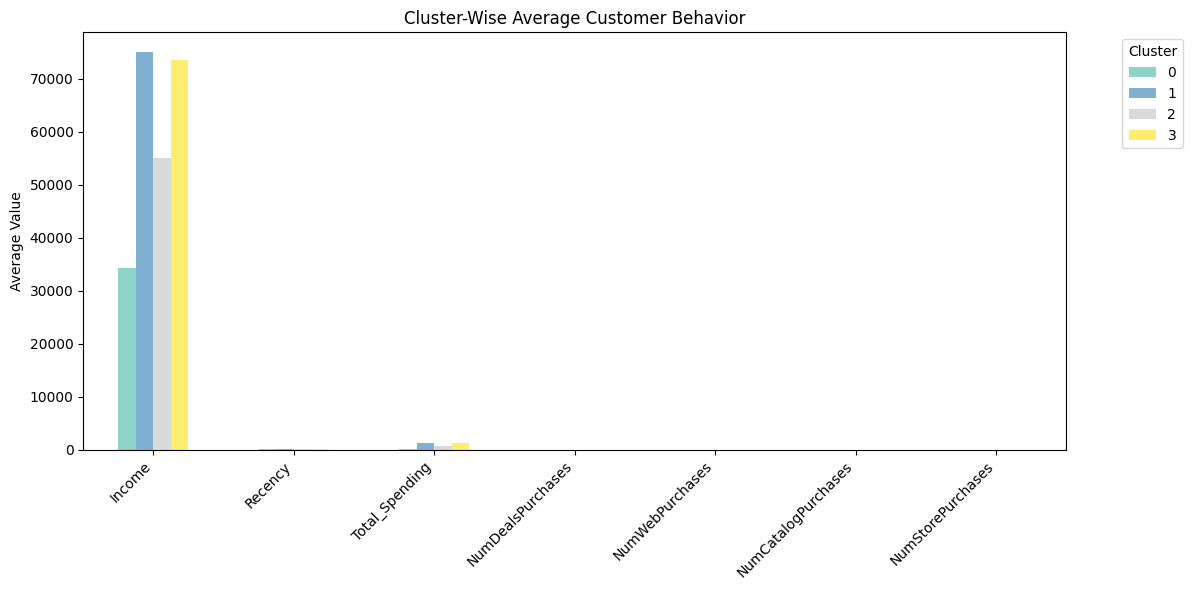

In [27]:
# Bar Chart: Mean Values of Features per Cluster

features_for_plot = [
    'Income', 'Recency', 'Total_Spending',
    'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases'
]

cluster_avg = cs.groupby('Cluster')[features_for_plot].mean().round(1)

cluster_avg.T.plot(kind='bar', figsize=(12, 6), colormap='Set3')
plt.title("Cluster-Wise Average Customer Behavior")
plt.ylabel("Average Value")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




<ipython-input-28-3065971706>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ss.countplot(data=cs, x='Cluster', palette='Set2')


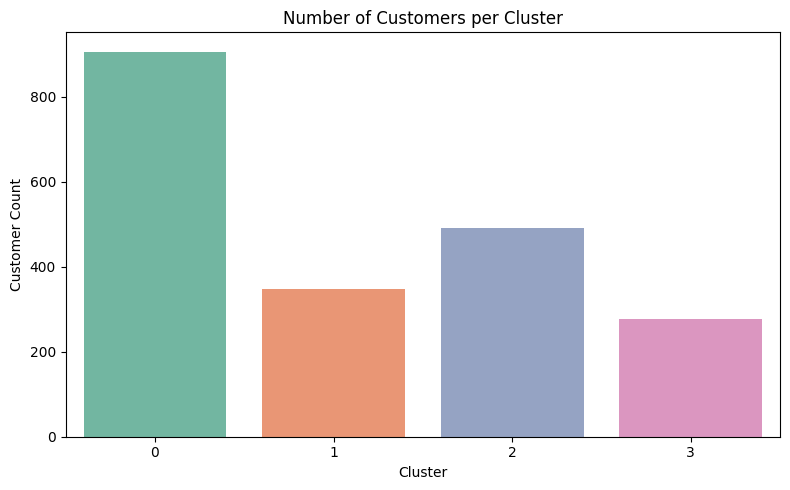

In [28]:
 #Count Plot: Number of Customers in Each Cluster
plt.figure(figsize=(8, 5))
ss.countplot(data=cs, x='Cluster', palette='Set2')
plt.title("Number of Customers per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()


In [21]:
cs.groupby('Cluster')[features].mean()


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Cluster,,,,,,,,,,,,
0,34270.073951,49.077263,38.780353,4.631347,20.920530,6.536424,4.974614,14.419426,1.951435,2.009934,0.528698,3.183223
1,75026.221902,49.665706,709.426513,38.743516,427.956772,67.051873,41.855908,60.161383,1.466859,5.239193,6.149856,8.510086
2,55002.694501,48.293279,406.816701,17.319756,112.890020,23.274949,16.778004,57.832994,4.016293,6.297352,2.558045,7.234216
3,73540.942238,48.296029,499.523466,97.974729,406.942238,127.725632,100.509025,95.415162,1.660650,5.725632,5.328520,8.476534
